In [37]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GaussianNoise
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [4]:
df = df.sample(frac=1.0)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


### Model structure: Basline model

In [21]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)


### Model save directory setting

In [45]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model training

In [109]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', patience=15)


Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWine = Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=250, batch_size=300,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/250
18/18 [==============================] - 0s 11ms/step - loss: 3.6994 - accuracy: 0.7544 - val_loss: 1.3419 - val_accuracy: 0.7623

Epoch 00001: val_loss improved from inf to 1.34192, saving model to ./Results\WineM.hdf5
Epoch 2/250
18/18 [==============================] - 0s 5ms/step - loss: 0.8688 - accuracy: 0.7580 - val_loss: 0.4428 - val_accuracy: 0.8292

Epoch 00002: val_loss improved from 1.34192 to 0.44277, saving model to ./Results\WineM.hdf5
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8525 - val_loss: 0.3524 - val_accuracy: 0.8615

Epoch 00003: val_loss improved from 0.44277 to 0.35242, saving model to ./Results\WineM.hdf5
Epoch 4/250
18/18 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8666 - val_loss: 0.2935 - val_accuracy: 0.9162

Epoch 00004: val_loss improved from 0.35242 to 0.29349, saving model to ./Results\WineM.hdf5
Epoch 5/250
18/18 [==============================] - 0s 6ms/ste

KeyboardInterrupt: 

### Plot loss graphs

Text(0, 0.5, 'loss')

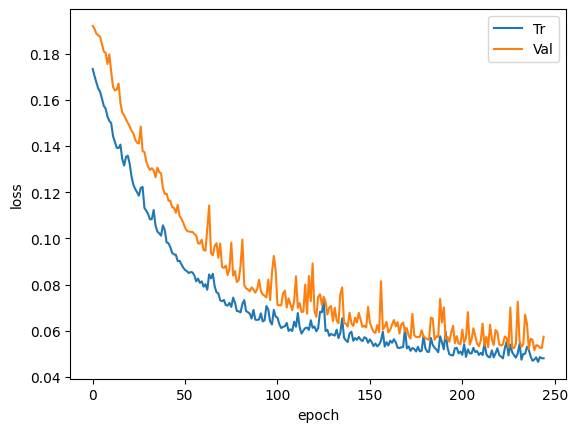

In [60]:
StartIDX = 5
plt.plot(HistWine.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWine.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: Dropout model

In [99]:
DRate = 0.07

def WineDropOutModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden1 = Dropout(DRate)(Hidden1)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden2 = Dropout(DRate)(Hidden2)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Hidden3 = Dropout(DRate)(Hidden3)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

### Model training

In [100]:
ModelSaveSameName = save_path+'WineDRM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=15)

WineDRM = WineDropOutModel()
WineDRM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineDRM = WineDRM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=250, batch_size=300,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/250
18/18 [==============================] - 0s 10ms/step - loss: 1.3051 - accuracy: 0.6629 - val_loss: 0.4178 - val_accuracy: 0.8392

Epoch 00001: val_loss improved from inf to 0.41781, saving model to ./Results\WineDRM.hdf5
Epoch 2/250
18/18 [==============================] - 0s 6ms/step - loss: 0.6975 - accuracy: 0.7358 - val_loss: 0.3622 - val_accuracy: 0.9015

Epoch 00002: val_loss improved from 0.41781 to 0.36224, saving model to ./Results\WineDRM.hdf5
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.8010 - val_loss: 0.3289 - val_accuracy: 0.9215

Epoch 00003: val_loss improved from 0.36224 to 0.32894, saving model to ./Results\WineDRM.hdf5
Epoch 4/250
18/18 [==============================] - 0s 5ms/step - loss: 0.4270 - accuracy: 0.8477 - val_loss: 0.3038 - val_accuracy: 0.8954

Epoch 00004: val_loss improved from 0.32894 to 0.30376, saving model to ./Results\WineDRM.hdf5
Epoch 5/250
18/18 [==============================] - 0s

### Plot loss graphs

Text(0, 0.5, 'loss')

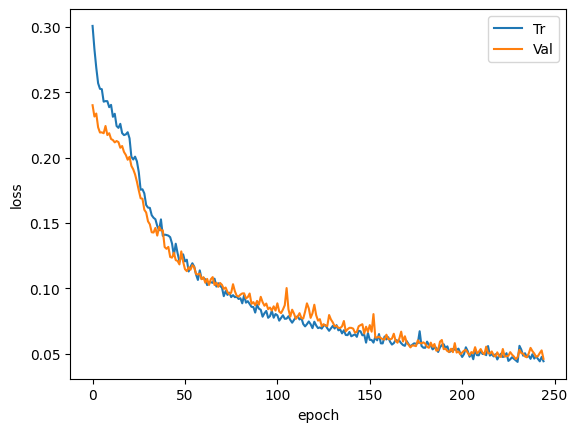

In [102]:
StartIDX = 5
plt.plot(HistWineDRM.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineDRM.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: Gaussian noise model

In [103]:
std = 0.07

def WineGNModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = GaussianNoise(std)(Inp)
    Hidden1 = GaussianNoise(std)(Hidden1)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden2 = GaussianNoise(std)(Hidden2)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Hidden3 = GaussianNoise(std)(Hidden3)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

### Model training

In [104]:
ModelSaveSameName = save_path+'WineGNM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=15)

WineGNM = WineDropOutModel()
WineGNM.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineGNM = WineGNM.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=250, batch_size=300,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/250
18/18 [==============================] - 0s 10ms/step - loss: 7.1354 - accuracy: 0.2766 - val_loss: 0.8145 - val_accuracy: 0.4846

Epoch 00001: val_loss improved from inf to 0.81446, saving model to ./Results\WineGNM.hdf5
Epoch 2/250
18/18 [==============================] - 0s 5ms/step - loss: 1.4539 - accuracy: 0.6240 - val_loss: 0.7795 - val_accuracy: 0.7769

Epoch 00002: val_loss improved from 0.81446 to 0.77954, saving model to ./Results\WineGNM.hdf5
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.7307 - val_loss: 0.5652 - val_accuracy: 0.8015

Epoch 00003: val_loss improved from 0.77954 to 0.56515, saving model to ./Results\WineGNM.hdf5
Epoch 4/250
18/18 [==============================] - 0s 7ms/step - loss: 0.7604 - accuracy: 0.7756 - val_loss: 0.3650 - val_accuracy: 0.8462

Epoch 00004: val_loss improved from 0.56515 to 0.36502, saving model to ./Results\WineGNM.hdf5
Epoch 5/250
18/18 [==============================] - 0s

### Plot loss graphs

Text(0, 0.5, 'loss')

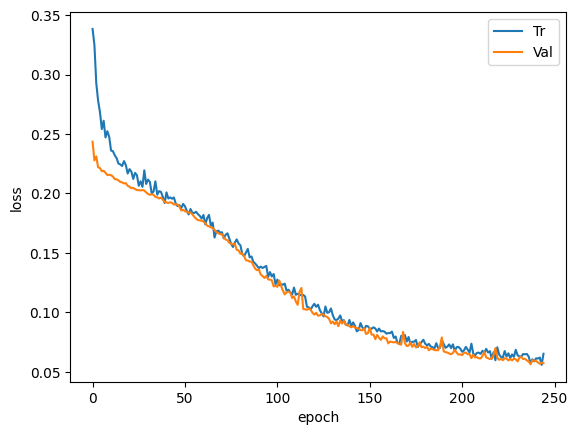

In [107]:
StartIDX = 5
plt.plot(HistWineGNM.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineGNM.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Accuracy difference between regularized and unregularized models

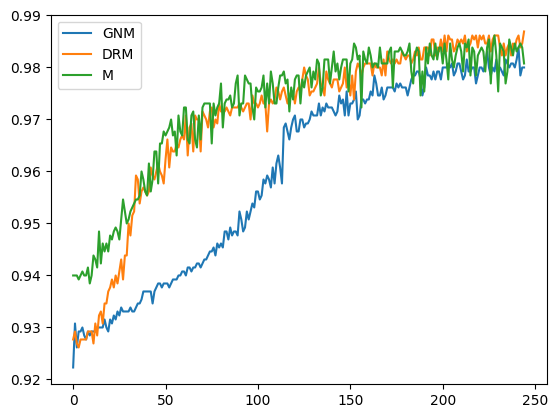

In [108]:
plt.plot(HistWineGNM.history['val_accuracy'][StartIDX:],  label='GNM')
plt.plot(HistWineDRM.history['val_accuracy'][StartIDX:],  label='DRM')

plt.plot(HistWine.history['val_accuracy'][StartIDX:],  label='M')
plt.legend()